<a href="https://colab.research.google.com/github/Gus-22/Gus-22/blob/main/5_escalonamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><u>**Escalonamento** </u></center><br>

Nas últimas aulas, vimos:
- como resolver sistemas lineares **triangulares**;
- como aplicar operações elementares em uma matriz.

<br>

Na aula de hoje iremos:
- aplicar operações elementares para transformar **sistemas arbitrários** em **sistemas triangulares** (e resolvê-los);
- determinar a **forma escalonada reduzida** de uma matriz.

<br><br>

***

<br>


In [ ]:
import numpy as np

def troca_linhas(V, i, j):
  # a linha abaixo cria uma matriz W com o mesmo formato de V
  W = np.zeros(np.shape(V))
  # n é o número de linhas da matriz
  n = len(V)
  # laço for que passa por cada linha de W
  for k in range(n):
    # se o indice k for igual a i, copiamos a linha j de V para a linha k de W
    if k == i:
      W[k] = V[j]
    # se o indice k for igual a j, copiamos a linha i de V para a linha k de W
    elif k == j:
      W[k] = V[i]
    # para todas as outras linhas, copiamos V direto para W
    else:
      W[k] = V[k]
  return W

def multiplica_linha(V, i, t):
  # criando uma matriz W com o mesmo formato de V
  W = np.zeros(np.shape(V))
  # n é o número de linhas da matriz
  n = len(V)
  # laço for que passa por cada linha de W
  for k in range(n):
    # copia a linha i de V para a linha i de W multiplicada pela constante t
    W[i] = V[i] * t
    if k != i: # se k for diferente da linha i que vai ser substituida, é pra copiar igual
      W[k] = V[k]
  return W

def substitui_linha(V, i, j, t):
  # cria uma matriz W com o mesmo formato de V
  W = np.zeros(np.shape(V))
  # n é o número de linhas da matriz
  n = len(V)
  # laço for que passa por cada linha de W
  for k in range(n):
    # se k for igual a linha que queremos substituir, k é igual a k + outra linha vezes a constante
    if k == i:
      W[k] = V[k] + V[j] * t
    else:  # se k não for a linha que queremos substituir, apenas copia igual
      W[k] = V[k]
  return W

def solve_diag_n(A, b):
  # n é o tamanho da matriz principal, ex = A(3 x 3)
  n = len(A)
  # cria um vetor x de zeros
  x = np.zeros(n)
  # laço for que começa a solução do sistema a partir da última linha até a primeira - ex: se A 3x3, então k começa de 2 e vai até - 1
  for k in range(n-1, -1, -1):
    # variável para calcular a soma dos produtos da linha atual
    soma = 0
    # percorre as colunas da matriz A a partir da diagonal principal
    for i in range(k+1, n):
      # soma o produto do elemento da matriz A com o elemento correspondente do vetor x
      soma = soma + A[k][i] * x[i]
    # calcula o valor de x[k] - variável na linha k do vetor x
    x[k] = (b[k] - soma) / A[k, k]
  #retorna o vetor x com a solução do sistema linear
  return x

## **<u>Sistema $3\times3$: caso particular</u>**
<br>

Vamos começar transformando o sistema $3\times3$ abaixo em um sistema $3\times3$ **triangular**:

$$ \begin{cases}
	         3x_0 +2x_1 + 3x_2 = 2\\
	         -6x_0 +2x_1 + x_2 = -1\\
	         x_0 -x_1 + x_2 = 3\\
\end{cases}
\quad\quad \rightsquigarrow\quad\quad
\begin{bmatrix}
	         3 & 2 & 3 \\
	         -6 & 2 & 1 \\
	         1 & -1 & 1
\end{bmatrix}
\begin{bmatrix}
	         x_0 \\
	         x_1 \\
           x_2 \\
\end{bmatrix}
=
\begin{bmatrix}
	         2 \\
	         -1 \\
           3
\end{bmatrix}.
$$
<br>

Triangularizamos o sistemas ao **zerarmos** as entradas $-6, 1$ e $-1$ do canto esquerdo inferior. Para isso, primeiro definimos a **matriz ampliada** do sistema e então usamos substituições de linha:

\begin{align}
\left[\begin{array}{ccc|c}
	         3 & 2 & 3 & 2 \\
	         -6 & 2 & 1 & -1 \\
	         1 & -1 & 1 & 3
\end{array}\right] &\underrightarrow{\tiny{L_1 \rightarrow L_1 + 2L_0}}
\left[\begin{array}{ccc|c}
	         3 & 2 & 3 & 2 \\
	         0 & 6 & 7 & 3 \\
	         1 & -1 & 1 & 3
\end{array}\right]\\ &\underrightarrow{\tiny{L_2 \rightarrow L_2 -\frac13L_0}}
\left[\begin{array}{ccc|c}
	         3 & 2 & 3 & 2 \\
	         0 & 6 & 7 & 3 \\
	         0 & -\frac53 & 0 & \frac73
\end{array}\right]\\ &\underrightarrow{\tiny{L_2 \rightarrow L_2 +\frac5{18}L_1}}
\left[\begin{array}{ccc|c}
	         3 & 2 & 3 & 2 \\
	         0 & 6 & 7 & 3 \\
	         0 & 0 & \frac{35}{18} & \frac73
\end{array}\right]
\end{align}

<br>

Nesse ponto, obtemos um sistema triangular e podemos utilizar o código das aulas passadas para resolvê-lo.

<br>

***

<br>

## Exercício 1: <br>

(a) Defina computacionalmente a **matriz ampliada** do sistemas inicial dado acima.


In [ ]:
# definindo a matriz e os termos independentes
M = np.array(([3, 2, 3], [-6, 2, 1], [1, -1, 1]))
b = np.array([2, -1, 3])

#np.column_stack concatena a matriz M e os termos independentes b e cria a matriz ampliada
M = np.column_stack((M, b))
print(M)

[[ 3  2  3  2]
 [-6  2  1 -1]
 [ 1 -1  1  3]]


(b) Implemente computacionalmente as operações de substituição de linha aplicadas acima, de modo a obter um sistema triangular, utilizando a função `substitui_linha` da aula passada.

In [ ]:
#usando a função substitui_linha para obter uma matriz M3 triangular
M1 = substitui_linha(M, 1, 0, 2)
M2 = substitui_linha(M1, 2, 0, -1/3)
M3 = substitui_linha(M2, 2, 1, 5/18)

print(M)
print()

#np.round é uma função que arredonda os valores da matriz
redonda = np.round(M3, 5)
print(redonda)

[[ 3  2  3  2]
 [-6  2  1 -1]
 [ 1 -1  1  3]]

[[3.      2.      3.      2.     ]
 [0.      6.      7.      3.     ]
 [0.      0.      1.94444 3.16667]]


<br>

(c) Determine a solução do sistema triangular utilizando a função `solve_triang_n` das aulas passadas e mostre que ela é solução do sistema $Ax = b$ (não-triangular) inicial.

In [ ]:
#considera todas as linhas da matriz
A = M3[:, :3]
#define os termos independentes, pegando apenas a coluna 3
b = M3[:, 3]

#função que calcula a diagonal principal de uma matriz triangular
x = solve_diag_n(A, b)
print(x)

[-0.02857143 -1.4         1.62857143]


***

> **Note que é essencial aplicar a triangularização na matriz <u>ampliada</u> do sistema, e não apenas na matriz $A$ de coeficientes.**

***

<br>

## **<u>Sistema $3\times3$: caso geral</u>**
<br>

Dado

$$ \begin{cases}
	         A_{00}x_0 +A_{01}x_1 + A_{02}x_2 = b_0\\
	         A_{10}x_0 +A_{10}x_1 + A_{12}x_2 = b_1\\
	         A_{20}x_0 +A_{20}x_1 + A_{22}x_2 = b_2\\
\end{cases}
\quad\quad \rightsquigarrow\quad\quad
\left[\begin{array}{ccc|c}
	         A_{00} & A_{01} & A_{02} & b_0 \\
	         A_{10} & A_{11} & A_{12} & b_1\\
	         A_{20} & A_{21} & A_{22} & b_2
\end{array}\right].
$$
<br>

Para triangularizar o sistema, devemos **zerar** as entradas $A_{10}, A_{20}, A_{21}$.

<br>

Para isso, usamos as seguintes substituições de linha: (verifique!)
- $L_1 \rightarrow L_1 - \frac{A_{10}}{A_{00}}L_0$;
- $L_2 \rightarrow L_2 - \frac{A_{20}}{A_{00}}L_0$;
- $L_2 \rightarrow L_2 - \frac{A_{21}}{A_{11}}L_1$.

<br>

Vamos implementar isso computacionalmente:


In [ ]:
def triangulariza_3(M):
  '''
  Tringulariza uma matriz M de três linhas através de substituições de linha.
  '''
  M1 = substitui_linha(M, 1, 0, -M[1][0]/M[0][0])
  M2 = substitui_linha(M1, 2, 0, -M1[2][0]/M[0][0])
  M3 = substitui_linha(M2, 2, 1, -M2[2][1]/M[1][1])
  return M3

# testando com a matriz M definida anteriormente
M = np.array([[3, 2, 3, 2], [-6, 2, 1, -1], [1, -1, 1, 3]])

print(triangulariza_3(M3))

[[3.         2.         3.         2.        ]
 [0.         6.         7.         3.        ]
 [0.         0.         1.94444444 3.16666667]]


<br>

***

<br>

# **<u>Sistemas $n\times n$: caso geral</u>**
<br>

Verifique que o código abaixo generaliza o anterior, comentando cada parte dele:

In [ ]:
def triangulariza_n(M):
  '''
  Triangulariza uma matriz M de dimensão qualquer.
  '''
  # obtém o número de linhas da matriz
  n = len(M)
  # laço for que percorre as colunas da matriz
  for j in range(n):
    # laço for que percorre as linhas abaixo da diagonal principal
    for i in range(j+1, n):
      # calcula o fator de multiplicação t para eliminar o elemento M[i][j]
      t = M[i, j] / M[j, j]
      # atualiza a linha i da matriz M para eliminar o elemento M[i][j]
      M[i] = M[i] - t * M[j]
  #retorna a matriz triangular
  return M

# teste o código acima na matriz abaixo
M = np.array([[3, 2, 3, 2], [-6, 2, 1, -1], [1, -1, 1, 3]])
triangulariza_n(M)

array([[3, 2, 3, 2],
       [0, 6, 7, 3],
       [0, 0, 1, 2]])

<br>

***

<br>

# **<u>Resolvendo sistemas arbitrários $n\times n$</u>**
<br>

> Obtemos uma função que resolve sistemas não-triangulares ao combinar o código acima com A função `solve_diag_n` das aulas passadas.

In [ ]:
# definindo a matriz M e os termos independentes
M = np.array(([3, 2, 3], [-6, 2, 1], [1, -1, 1]))
b = np.array(([2], [-1], [3]))

def solve_n(A, b):
  '''
  Resolve sistemas n x n, triangularizando-os primeiro.
  '''
  # np.hstack cria a matriz aumentada do sistema, juntando a matriz principal e os resultados
  M = np.hstack((A, b))
  # triangulariza_n está escalonando a matriz M
  M = triangulariza_n(M)
  # A passa a ser M menos a ultima coluna, ou seja, desfaz hstack
  A = M[:, :-1]
  # b passa a ser separado novamente, possibilitando o uso da função solve_triang_n
  b = M[:, -1]
  # solve_triang_n resolve a matriz
  x = solve_diag_n(A, b)
  return x

#aplicando a função que acabamos de definir
res = solve_n(A, b)
print(res)

[ 0.43492063 -1.96666667  1.54285714]


<br>

- <u>**ATENÇÃO**</u>: O código acima possui um problema: o coeficiente $t$ que usamos na substituição de linha é do tipo $\frac{M_{ji}}{M_{ii}}$. Essa divisão não está bem definida se em algum passo intermediário obtermos uma matriz com o termo diagonal $M_{ii}$ igual a **zero**.

<br><br>

> **Você consegue pensar em uma maneira de contornar esse problema?**

Uma solução é fazer uma verificação antes da divisão.

Se o elemento diagonal Mii for zero, você pode trocar a linha atual com uma linha abaixo que tenha um valor não zero na mesma coluna.

Essa troca de linha é conhecida como "pivoteamento" e ajuda a evitar a divisão por zero.

<br>

***

<br>

# **<u>Escalonando matrizes</u>**
<br>

A função definida abaixo pode ser utilizada para obter a forma escalonada reduzida matrizes. Baseando-se nos códigos anteriores, estude o código abaixo e comente-o.

In [ ]:
def escalona(M):
  '''
  Retorna a forma escalonada reduzida da matriz M.
  '''
  # obtém o número de linhas da matriz
  n = len(M)
  # laço for que percorre as linhas da matriz
  for k in range(n):
    # substitui a linha, fazendo com que o elemento M[k][k] seja igual a 1
    M[k] = M[k] / M[k, k] # divide a linha k inteira pelo elemento da diagonal
    # laço for que percorre as linhas da matriz
    for i in range(n):
      # verifica se a linha não é a mesma linha que acabamos de substituir
      if i != k:
        # atualiza as outras linhas, fazendo com que os elementos abaixo de M[i][k] sejam 0
        M[i] = M[i] - M[i, k] * M[k]
  #retorna a matriz escalonada reduzida
  return M

# testando
M = np.array([[3, 2, 3, 2], [-6, 2, 1, -1], [1, -1, 1, 3]])
print(escalona(M))

[[ 1  0  0 -1]
 [ 0  1  0 -3]
 [ 0  0  1  1]]


<br>

***

<br>

# Exercício 2:
<br>

Descreva, caso exista, a solução para os seguintes sistemas lineares utilizando os métodos estudados em aula.

a) $\begin{cases}
	         2x_0 + 3x_1 + x_2 +5x_3 = 11\\
	         x_0  + 3.5x_1 + x_2 +7.5x_3 = 13\\
	         1.4x_0 + 2.7x_1 + 5.5x_2 + 12x_3 = 21.6\\
	         -2x_0 + 1x_1 + 3x_2 +28x_3 = 30
	  \end{cases}$

In [ ]:
#definindo a matriz M aumentada, a matriz A principal e os termos independentes b
M = np.array(([2, 3, 1, 5, 11],
              [1, 3.5, 1, 7.5, 13],
              [1.4, 2.7, 5.5, 12, 21.6],
              [-2, 1, 3, 28, 30]))

A = np.array(([2, 3, 1, 5],
              [1, 3.5, 1, 7.5],
              [1.4, 2.7, 5.5, 12],
              [-2, 1, 3, 28]))

b = np.array(([11], [13], [21.6], [30]))

#escalona a matriz
escalonando = escalona(M)
print(escalonando)
print()
#resolve a matriz
res = solve_n(A, b)
print(res)

[[1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 1.]]

[1. 1. 1. 1.]


<br>

b) $\begin{cases}
	         6.1x_0 + 0.32x_1 + 1.3x_2 + 2.1x_3 + 0.11x_4 = 19.52\\
	         0.82x_0 + 8.81x_1 + 1.01x_2 + 3x_3 + 3.12x_4 = 15.83\\
	         0.5x_0 + 1.78x_1 + 15.2x_2 + 4.2x_3 +8.1x_4 = -22.14\\
	         0.2x_0 + 9.1x_1 + 4.68x_2 +4.3x_3 +20.1x_4  = -21.78
	  \end{cases}$

In [ ]:
#definindo a matriz M aumentada, a matriz A principal e os termos independentes b
M = np.array(([6.1, 0.32, 1.3, 2.1, 0.11, 19.52],
              [0.82, 8.81, 1.01, 3, 3.12, 15.83],
              [0.5, 1.78, 15.2, 4.2, 8.1, -22.14],
              [0.2, 9.1, 4.68, 4.3, 20.1, -21.78]))

A = np.array(([6.1, 0.32, 1.3, 2.1, 0.11],
              [0.82, 8.81, 1.01, 3, 3.12],
              [0.5, 1.78, 15.2, 4.2, 8.1],
              [0.2, 9.1, 4.68, 4.3, 20.1]))

b = np.array(([19.52], [15.83], [-22.14], [-21.78]))

#escalona a matriz e arredonda os valores
escalonando = escalona(M)
print(np.round(escalonando, 5))
print()
#resolve a matriz
res = solve_n(A, b)
print(res)

[[  1.        0.        0.        0.       -7.96114  18.92228]
 [  0.        1.        0.        0.       -7.78425  17.56849]
 [  0.        0.        1.        0.       -6.0628   11.1256 ]
 [  0.        0.        0.        1.       28.11692 -55.23384]]

[ 18.92227507  17.56849184  11.12559822 -55.23384428]


**Conclusão:** o sistema tem mais de uma solução pois a quantidade de variáveis é superior a dimensão da matriz
*   mesmo depois de escalonar, há variáveis que ainda não foram eliminadas

<br>

***

<br>

# Exercício 3:
<br>

Determine o polinômio de grau 3

$$
P(x) = a_0 + a_1x + a_2x^2 + a_3x^3
$$

que passa pelos pontos $(1,3)$, $(2,-2)$, $(3,-5)$ e $(4,0)$. Plote o gráfico mostrando o polinômio obtido e os pontos dados.

In [ ]:
import matplotlib.pyplot as plt
import sympy as sp

x = np.array([1, 2, 3, 4])
b = np.array([[3, -2, -5, 0]]).T

A = np.array([x**0, x, x**2, x**3]).T

coeficientes = solve_n(A, b)

funcao = lambda x: coeficientes[0] + coeficientes[1]*x + coeficientes[2]*x**2 + coeficientes[3]*x**3

x_simbolo = sp.symbols("x")
sp.expand(funcao(x_simbolo))

1.0*x**3 - 5.0*x**2 + 3.0*x + 4.0

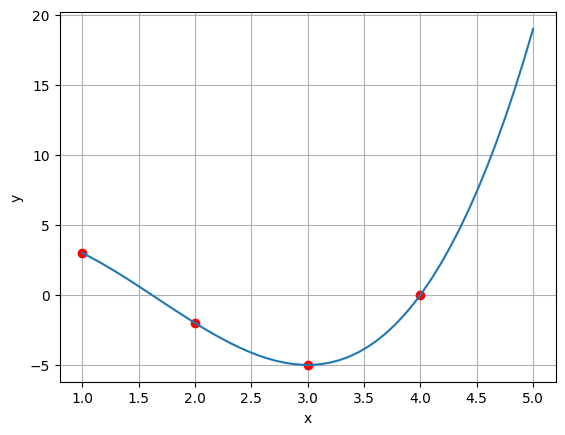

In [ ]:
X = np.linspace(1, 5)
plt.plot(x, b, "ro", X, funcao(X))
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()